# Carga y preprocesamiento de datos

### _Carga de la [base de datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip) obtenida._ 

In [1]:
#lo primero que vemos aqui, es que la url ya no conduce a los datos, con lo cual dentro de esa pagina, en su buscador escribimos beijing y accedemos a los datos

nueva_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'

#tenemos una extension .zip, quiere decir que es un archivo comprimido, por lo que necesitamos descomprimirlo
import requests
import zipfile
import io

#vamos a crear una carpeta donde guardaremos los datos
import os

#creamos la carpeta
os.makedirs('./beijing', exist_ok=True)

#descargamos el archivo
r = requests.get(nueva_url)

#creamos un objeto zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))

#extraemos los archivos
z.extractall('./beijing')

### Obtenemos el dataframe y previsualizamos el head

In [3]:
import pandas as pd

#creamos un dataframe vacio
df = pd.DataFrame()

#iteramos sobre los archivos de la carpeta beijing y los leemos con pandas
for file in os.listdir('./beijing/PRSA_Data_20130301-20170228'):
    if file.endswith('.csv'):
        df = pd.concat([df, pd.read_csv('./beijing/PRSA_Data_20130301-20170228/' + file)])


In [5]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Check de valores duplicados y nulos

In [6]:
#ya tenemos nuestro df, ahora vamos a comprobar los valores repetidos y los valores nulos
print(df.duplicated().sum())

0


In [7]:
#nulos por % 
print(df.isnull().sum()/len(df)*100)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


### Es una buena práctica utilizar un heatmap para visualizar donde están distribuidos los valores nulos

<Axes: >

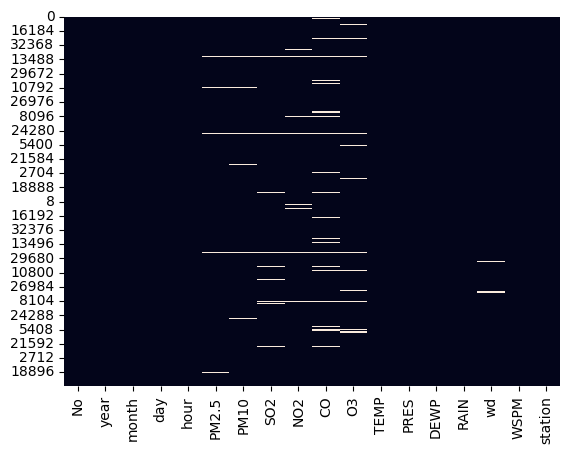

In [8]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [9]:
#vemos de que tipo son nuestros datos
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Reparación de valores nulos

In [11]:
#reparamos los valores nulos para float, objets y ints, ya que representan muy poco % de los datos y no afectaran el modelo
#si el % fuera mayor por ejemplo un 20% podriamos usar knn 

def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

df = impute_missing_values(df)
df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [12]:
#vemos que ya no hay valores nulos
print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64
